# 1

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# افزودن مسیر دایرکتوری جاری
sys.path.append(os.getcwd())

from Core.models import Sequential
from Core.layers import RoughHybridRecurrentLayer, SimpleElmanLayer
from Core.losses import MSELoss
from Core.optimizers import SGD
from Utils.data_utils import DataHandler

# تنظیمات گرافیکی
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported for Q2.")

Libraries imported for Q2.


# 2

In [2]:
def plot_recur_predictions(rough_model, simple_model, X, y_true, title="Prediction Comparison", sample_range=None):
    """
    Plots predictions of Rough Hybrid RNN vs Simple Elman RNN vs True Data.
    Also visualizes the Rough Interval [y_L, y_U].
    """
    # 1. Reset states before prediction (Critical for RNNs)
    rough_model.reset_states()
    simple_model.reset_states()
    
    # 2. Get Crisp Predictions
    y_pred_rough = rough_model.predict(X).flatten()
    y_pred_simple = simple_model.predict(X).flatten()
    y_true = y_true.flatten()
    
    # 3. Extract Lower and Upper bounds manually from Rough Model
    y_L_list = []
    y_U_list = []
    
    # Access the recurrent layer (Assumed to be the first layer)
    rnn_layer = rough_model.layers[0]
    
    rough_model.reset_states() # Reset again for manual loop
    for i in range(len(X)):
        rough_model.forward(X[i])
        # After forward, y_L and y_U are stored in the layer
        y_L_list.append(rnn_layer.y_L.item())
        y_U_list.append(rnn_layer.y_U.item())
        
    y_L = np.array(y_L_list)
    y_U = np.array(y_U_list)
    
    # Optional: Zoom
    if sample_range:
        start, end = sample_range
        indices = range(start, end)
    else:
        indices = range(len(y_true))
        
    # 4. Plotting
    plt.figure(figsize=(14, 7))
    
    # Plot True Data
    plt.plot(indices, y_true[indices], color='black', alpha=0.6, label='Actual Data', linewidth=2)
    
    # Plot Simple Elman
    plt.plot(indices, y_pred_simple[indices], color='blue', linestyle='--', label='Simple Elman (Non-Rough)')
    
    # Plot Rough Hybrid (Crisp)
    plt.plot(indices, y_pred_rough[indices], color='red', linestyle='-', label='Rough Hybrid (Crisp)')
    
    # Fill Rough Interval
    plt.fill_between(indices, y_L[indices], y_U[indices], color='red', alpha=0.15, label='Rough Interval')
    
    plt.title(title)
    plt.legend()
    plt.xlabel("Time Step")
    plt.ylabel("Normalized Value")
    plt.show()

# 3

In [3]:
# Paths
TEHRAN_PATH = '../HW2/Datasets/regression/Tehran Stock Exchange-index.xlsx'
ECG_PATH = '../HW2/Datasets/regression/ECG Datasets.xlsx'

# 1. Load Data
print("Loading Datasets...")
tehran_raw = DataHandler.load_data(TEHRAN_PATH)
ecg_raw = DataHandler.load_data(ECG_PATH)

# 2. Normalize
tehran_norm, scaler_teh = DataHandler.normalize_data(tehran_raw)
ecg_norm, scaler_ecg = DataHandler.normalize_data(ecg_raw)

# 3. Create Sequences
# Input: 5 steps, Prediction Horizon: 3 steps ahead
INPUT_STEPS = 5
PRED_HORIZON = 3

X_teh, y_teh = DataHandler.create_sequences(tehran_norm, input_steps=INPUT_STEPS, prediction_horizon=PRED_HORIZON)
X_ecg, y_ecg = DataHandler.create_sequences(ecg_norm, input_steps=INPUT_STEPS, prediction_horizon=PRED_HORIZON)

# 4. Train/Test Split (No shuffle for Time Series)
X_train_teh, X_test_teh, y_train_teh, y_test_teh = DataHandler.train_test_split(X_teh, y_teh, train_ratio=0.7, shuffle=False)
X_train_ecg, X_test_ecg, y_train_ecg, y_test_ecg = DataHandler.train_test_split(X_ecg, y_ecg, train_ratio=0.7, shuffle=False)

print(f"Tehran Stock Data: Train={X_train_teh.shape}, Test={X_test_teh.shape}")
print(f"ECG Data: Train={X_train_ecg.shape}, Test={X_test_ecg.shape}")

Loading Datasets...
Tehran Stock Data: Train=(345, 5), Test=(148, 5)
ECG Data: Train=(2618, 5), Test=(1123, 5)


# 4 - Tehran Stock Exchange Analysis

In [4]:
# Helper function for plotting loss curves
def plot_loss_curves(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='Train Loss', linewidth=2)
    plt.plot(history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


TRAINING MODEL A: Rough Hybrid RNN (Tehran Stock)
Starting Training | Mode: SGD | Epochs: 300 | Samples: 345
Validation enabled | Val Samples: 148


Epoch 1/300: 100%|██████████| 345/345 [00:00<00:00, 711.93sample/s, train_loss=0.00073]


Epoch 1 finished. Train Loss: 0.018456 | Val Loss: 0.008858


Epoch 10/300: 100%|██████████| 345/345 [00:00<00:00, 785.92sample/s, train_loss=0.00019]


Epoch 10 finished. Train Loss: 0.003741 | Val Loss: 0.003739


Epoch 20/300: 100%|██████████| 345/345 [00:00<00:00, 888.50sample/s, train_loss=0.00009]


Epoch 20 finished. Train Loss: 0.001628 | Val Loss: 0.002346


Epoch 30/300: 100%|██████████| 345/345 [00:00<00:00, 786.54sample/s, train_loss=0.00008]


Epoch 30 finished. Train Loss: 0.001529 | Val Loss: 0.002123


Epoch 40/300: 100%|██████████| 345/345 [00:00<00:00, 997.90sample/s, train_loss=0.00009] 


Epoch 40 finished. Train Loss: 0.001468 | Val Loss: 0.001997


Epoch 50/300: 100%|██████████| 345/345 [00:00<00:00, 753.07sample/s, train_loss=0.00009]


Epoch 50 finished. Train Loss: 0.001410 | Val Loss: 0.001894


Epoch 60/300: 100%|██████████| 345/345 [00:00<00:00, 859.89sample/s, train_loss=0.00009]


Epoch 60 finished. Train Loss: 0.001356 | Val Loss: 0.001806


Epoch 70/300: 100%|██████████| 345/345 [00:00<00:00, 926.52sample/s, train_loss=0.00009]


Epoch 70 finished. Train Loss: 0.001306 | Val Loss: 0.001730


Epoch 80/300: 100%|██████████| 345/345 [00:00<00:00, 787.07sample/s, train_loss=0.00008]


Epoch 80 finished. Train Loss: 0.001264 | Val Loss: 0.001665


Epoch 90/300: 100%|██████████| 345/345 [00:00<00:00, 949.44sample/s, train_loss=0.00008] 


Epoch 90 finished. Train Loss: 0.001227 | Val Loss: 0.001609


Epoch 100/300: 100%|██████████| 345/345 [00:00<00:00, 968.03sample/s, train_loss=0.00007] 


Epoch 100 finished. Train Loss: 0.001195 | Val Loss: 0.001561


Epoch 110/300: 100%|██████████| 345/345 [00:00<00:00, 874.27sample/s, train_loss=0.00007]


Epoch 110 finished. Train Loss: 0.001168 | Val Loss: 0.001521


Epoch 120/300: 100%|██████████| 345/345 [00:00<00:00, 1074.13sample/s, train_loss=0.00006]


Epoch 120 finished. Train Loss: 0.001145 | Val Loss: 0.001489


Epoch 130/300: 100%|██████████| 345/345 [00:00<00:00, 1061.95sample/s, train_loss=0.00006]


Epoch 130 finished. Train Loss: 0.001125 | Val Loss: 0.001462


Epoch 140/300: 100%|██████████| 345/345 [00:00<00:00, 1046.44sample/s, train_loss=0.00006]


Epoch 140 finished. Train Loss: 0.001108 | Val Loss: 0.001439


Epoch 150/300: 100%|██████████| 345/345 [00:00<00:00, 1036.62sample/s, train_loss=0.00005]


Epoch 150 finished. Train Loss: 0.001092 | Val Loss: 0.001419


Epoch 160/300: 100%|██████████| 345/345 [00:00<00:00, 1055.31sample/s, train_loss=0.00005]


Epoch 160 finished. Train Loss: 0.001078 | Val Loss: 0.001402


Epoch 170/300: 100%|██████████| 345/345 [00:00<00:00, 989.55sample/s, train_loss=0.00005] 


Epoch 170 finished. Train Loss: 0.001066 | Val Loss: 0.001388


Epoch 180/300: 100%|██████████| 345/345 [00:00<00:00, 915.27sample/s, train_loss=0.00005] 


Epoch 180 finished. Train Loss: 0.001054 | Val Loss: 0.001375


Epoch 190/300: 100%|██████████| 345/345 [00:00<00:00, 871.63sample/s, train_loss=0.00005] 


Epoch 190 finished. Train Loss: 0.001043 | Val Loss: 0.001363


Epoch 200/300: 100%|██████████| 345/345 [00:00<00:00, 906.53sample/s, train_loss=0.00005] 


Epoch 200 finished. Train Loss: 0.001033 | Val Loss: 0.001352


Epoch 210/300: 100%|██████████| 345/345 [00:00<00:00, 1040.62sample/s, train_loss=0.00005]


Epoch 210 finished. Train Loss: 0.001024 | Val Loss: 0.001343


Epoch 220/300: 100%|██████████| 345/345 [00:00<00:00, 651.26sample/s, train_loss=0.00004]


Epoch 220 finished. Train Loss: 0.001015 | Val Loss: 0.001334


Epoch 230/300: 100%|██████████| 345/345 [00:00<00:00, 742.64sample/s, train_loss=0.00004]


Epoch 230 finished. Train Loss: 0.001006 | Val Loss: 0.001325


Epoch 240/300: 100%|██████████| 345/345 [00:00<00:00, 1053.15sample/s, train_loss=0.00004]


Epoch 240 finished. Train Loss: 0.000998 | Val Loss: 0.001317


Epoch 250/300: 100%|██████████| 345/345 [00:00<00:00, 985.45sample/s, train_loss=0.00004]


Epoch 250 finished. Train Loss: 0.000991 | Val Loss: 0.001310


Epoch 260/300: 100%|██████████| 345/345 [00:00<00:00, 758.62sample/s, train_loss=0.00004]


Epoch 260 finished. Train Loss: 0.000983 | Val Loss: 0.001302


Epoch 270/300: 100%|██████████| 345/345 [00:00<00:00, 959.20sample/s, train_loss=0.00004]


Epoch 270 finished. Train Loss: 0.000976 | Val Loss: 0.001295


Epoch 280/300: 100%|██████████| 345/345 [00:00<00:00, 1062.28sample/s, train_loss=0.00004]


Epoch 280 finished. Train Loss: 0.000969 | Val Loss: 0.001289


Epoch 290/300: 100%|██████████| 345/345 [00:00<00:00, 1082.64sample/s, train_loss=0.00004]


Epoch 290 finished. Train Loss: 0.000962 | Val Loss: 0.001282


Epoch 300/300: 100%|██████████| 345/345 [00:00<00:00, 1035.14sample/s, train_loss=0.00004]


Epoch 300 finished. Train Loss: 0.000956 | Val Loss: 0.001276
Training Complete. Time: 31.53s


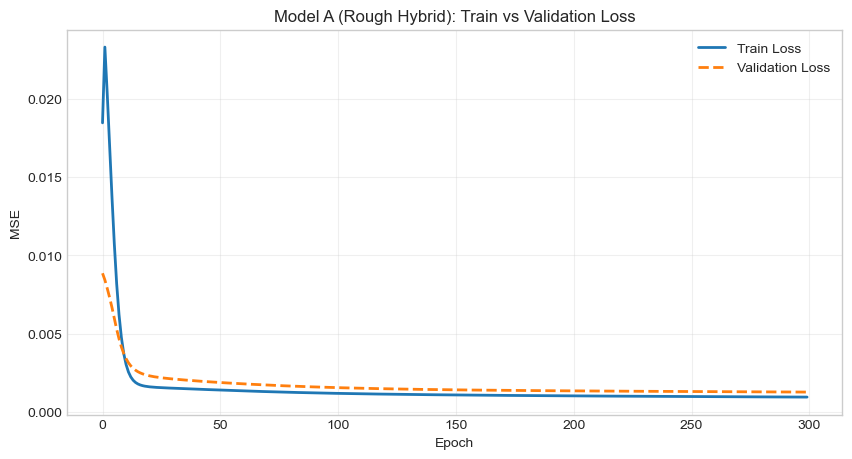

In [5]:
# A) Rough Hybrid Recurrent Network
print("\n" + "="*50)
print("TRAINING MODEL A: Rough Hybrid RNN (Tehran Stock)")
print("="*50)

model_rough_teh = Sequential()
# memory_depth=2 enables looking back at t-1 and t-2
model_rough_teh.add(RoughHybridRecurrentLayer(input_dim=5, hidden_dim=8, output_dim=1, memory_depth=2))

optimizer = SGD(lr=0.2)
model_rough_teh.compile(loss=MSELoss(), optimizer=optimizer)

hist_rough_teh = model_rough_teh.fit(X_train_teh, y_train_teh, 
                                     validation_data=(X_test_teh, y_test_teh),
                                     epochs=300, verbose=True, log_freq=10)

# 1. Plot Learning Curves for Rough Model
plot_loss_curves(hist_rough_teh, "Model A (Rough Hybrid): Train vs Validation Loss")


TRAINING MODEL B: Simple Elman RNN (Tehran Stock)
Starting Training | Mode: SGD | Epochs: 300 | Samples: 345
Validation enabled | Val Samples: 148


Epoch 1/300: 100%|██████████| 345/345 [00:00<00:00, 1030.31sample/s, train_loss=0.00078]


Epoch 1 finished. Train Loss: 0.019361 | Val Loss: 0.009298


Epoch 10/300: 100%|██████████| 345/345 [00:00<00:00, 836.74sample/s, train_loss=0.00027]


Epoch 10 finished. Train Loss: 0.006301 | Val Loss: 0.004310


Epoch 20/300: 100%|██████████| 345/345 [00:00<00:00, 964.34sample/s, train_loss=0.00007]


Epoch 20 finished. Train Loss: 0.001598 | Val Loss: 0.002255


Epoch 30/300: 100%|██████████| 345/345 [00:00<00:00, 975.60sample/s, train_loss=0.00005]


Epoch 30 finished. Train Loss: 0.001444 | Val Loss: 0.001997


Epoch 40/300: 100%|██████████| 345/345 [00:00<00:00, 802.19sample/s, train_loss=0.00004]


Epoch 40 finished. Train Loss: 0.001419 | Val Loss: 0.001912


Epoch 50/300: 100%|██████████| 345/345 [00:00<00:00, 1042.65sample/s, train_loss=0.00004]


Epoch 50 finished. Train Loss: 0.001402 | Val Loss: 0.001856


Epoch 60/300: 100%|██████████| 345/345 [00:00<00:00, 1103.38sample/s, train_loss=0.00004]


Epoch 60 finished. Train Loss: 0.001387 | Val Loss: 0.001811


Epoch 70/300: 100%|██████████| 345/345 [00:00<00:00, 854.80sample/s, train_loss=0.00004] 


Epoch 70 finished. Train Loss: 0.001373 | Val Loss: 0.001771


Epoch 80/300: 100%|██████████| 345/345 [00:00<00:00, 1166.83sample/s, train_loss=0.00004]


Epoch 80 finished. Train Loss: 0.001359 | Val Loss: 0.001735


Epoch 90/300: 100%|██████████| 345/345 [00:00<00:00, 1198.44sample/s, train_loss=0.00004]


Epoch 90 finished. Train Loss: 0.001346 | Val Loss: 0.001703


Epoch 100/300: 100%|██████████| 345/345 [00:00<00:00, 679.16sample/s, train_loss=0.00004] 


Epoch 100 finished. Train Loss: 0.001333 | Val Loss: 0.001673


Epoch 110/300: 100%|██████████| 345/345 [00:00<00:00, 1082.22sample/s, train_loss=0.00004]


Epoch 110 finished. Train Loss: 0.001320 | Val Loss: 0.001644


Epoch 120/300: 100%|██████████| 345/345 [00:00<00:00, 876.44sample/s, train_loss=0.00004] 


Epoch 120 finished. Train Loss: 0.001308 | Val Loss: 0.001618


Epoch 130/300: 100%|██████████| 345/345 [00:00<00:00, 1039.05sample/s, train_loss=0.00004]


Epoch 130 finished. Train Loss: 0.001296 | Val Loss: 0.001593


Epoch 140/300: 100%|██████████| 345/345 [00:00<00:00, 1192.90sample/s, train_loss=0.00004]


Epoch 140 finished. Train Loss: 0.001285 | Val Loss: 0.001569


Epoch 150/300: 100%|██████████| 345/345 [00:00<00:00, 990.06sample/s, train_loss=0.00003] 


Epoch 150 finished. Train Loss: 0.001274 | Val Loss: 0.001546


Epoch 160/300: 100%|██████████| 345/345 [00:00<00:00, 1058.76sample/s, train_loss=0.00003]


Epoch 160 finished. Train Loss: 0.001263 | Val Loss: 0.001524


Epoch 170/300: 100%|██████████| 345/345 [00:00<00:00, 1212.91sample/s, train_loss=0.00003]


Epoch 170 finished. Train Loss: 0.001252 | Val Loss: 0.001503


Epoch 180/300: 100%|██████████| 345/345 [00:00<00:00, 1204.54sample/s, train_loss=0.00003]


Epoch 180 finished. Train Loss: 0.001241 | Val Loss: 0.001482


Epoch 190/300: 100%|██████████| 345/345 [00:00<00:00, 1216.59sample/s, train_loss=0.00003]


Epoch 190 finished. Train Loss: 0.001231 | Val Loss: 0.001463


Epoch 200/300: 100%|██████████| 345/345 [00:00<00:00, 1041.65sample/s, train_loss=0.00003]


Epoch 200 finished. Train Loss: 0.001221 | Val Loss: 0.001445


Epoch 210/300: 100%|██████████| 345/345 [00:00<00:00, 1210.27sample/s, train_loss=0.00003]


Epoch 210 finished. Train Loss: 0.001212 | Val Loss: 0.001427


Epoch 220/300: 100%|██████████| 345/345 [00:00<00:00, 1202.07sample/s, train_loss=0.00003]


Epoch 220 finished. Train Loss: 0.001202 | Val Loss: 0.001409


Epoch 230/300: 100%|██████████| 345/345 [00:00<00:00, 1226.06sample/s, train_loss=0.00003]


Epoch 230 finished. Train Loss: 0.001193 | Val Loss: 0.001393


Epoch 240/300: 100%|██████████| 345/345 [00:00<00:00, 1206.69sample/s, train_loss=0.00003]


Epoch 240 finished. Train Loss: 0.001184 | Val Loss: 0.001376


Epoch 250/300: 100%|██████████| 345/345 [00:00<00:00, 1047.49sample/s, train_loss=0.00003]


Epoch 250 finished. Train Loss: 0.001175 | Val Loss: 0.001361


Epoch 260/300: 100%|██████████| 345/345 [00:00<00:00, 1212.43sample/s, train_loss=0.00003]


Epoch 260 finished. Train Loss: 0.001166 | Val Loss: 0.001346


Epoch 270/300: 100%|██████████| 345/345 [00:00<00:00, 1212.72sample/s, train_loss=0.00003]


Epoch 270 finished. Train Loss: 0.001157 | Val Loss: 0.001331


Epoch 280/300: 100%|██████████| 345/345 [00:00<00:00, 1205.58sample/s, train_loss=0.00003]


Epoch 280 finished. Train Loss: 0.001149 | Val Loss: 0.001317


Epoch 290/300: 100%|██████████| 345/345 [00:00<00:00, 1226.61sample/s, train_loss=0.00003]


Epoch 290 finished. Train Loss: 0.001141 | Val Loss: 0.001303


Epoch 300/300: 100%|██████████| 345/345 [00:00<00:00, 1062.57sample/s, train_loss=0.00003]


Epoch 300 finished. Train Loss: 0.001132 | Val Loss: 0.001289
Training Complete. Time: 18.64s


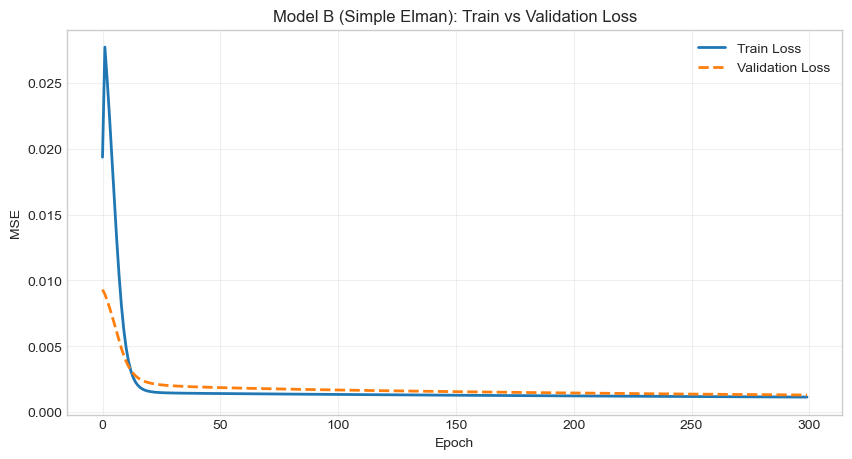

In [6]:
# B) Simple Elman Network (Comparison)
print("\n" + "="*50)
print("TRAINING MODEL B: Simple Elman RNN (Tehran Stock)")
print("="*50)

model_simple_teh = Sequential()
model_simple_teh.add(SimpleElmanLayer(input_dim=5, hidden_dim=8, output_dim=1))

optimizer_simple = SGD(lr=0.1)
model_simple_teh.compile(loss=MSELoss(), optimizer=optimizer_simple)

hist_simple_teh = model_simple_teh.fit(X_train_teh, y_train_teh, 
                                       validation_data=(X_test_teh, y_test_teh),
                                       epochs=300, verbose=True, log_freq=10)

# 2. Plot Learning Curves for Simple Model
plot_loss_curves(hist_simple_teh, "Model B (Simple Elman): Train vs Validation Loss")


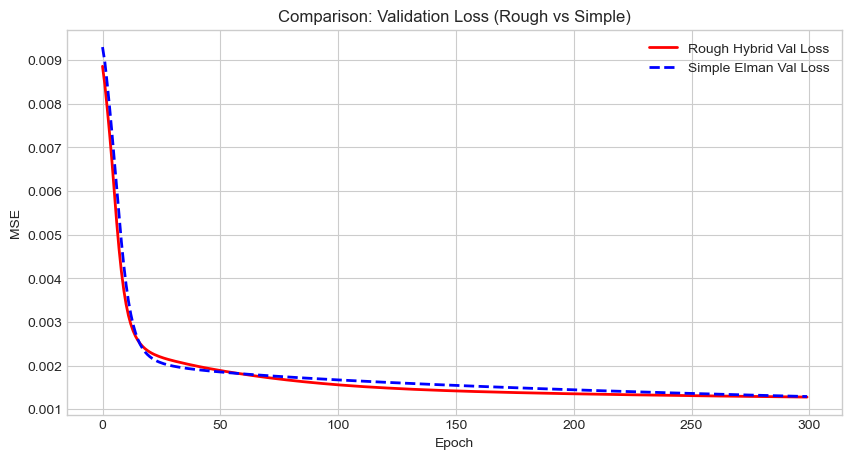

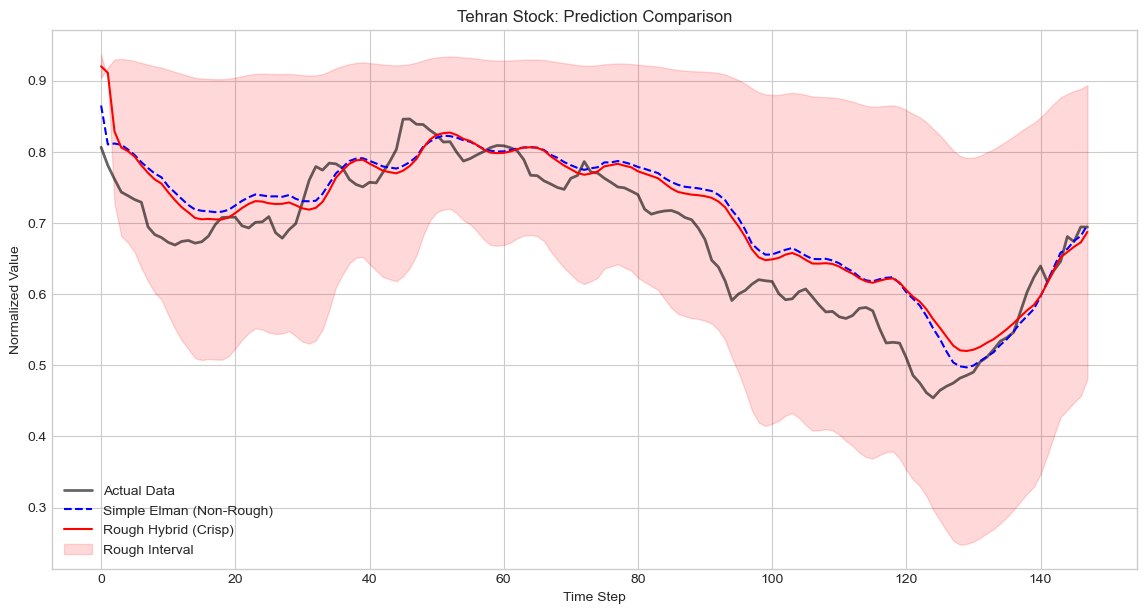

In [7]:
# C) Comparisons

# 3. Compare Validation Losses
plt.figure(figsize=(10, 5))
plt.plot(hist_rough_teh['val_loss'], label='Rough Hybrid Val Loss', color='red', linewidth=2)
plt.plot(hist_simple_teh['val_loss'], label='Simple Elman Val Loss', color='blue', linestyle='--', linewidth=2)
plt.title("Comparison: Validation Loss (Rough vs Simple)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

# 4. Visualize Predictions (Zoom in)
# We show a slice of 100 samples to clearly see the signal tracking
plot_recur_predictions(model_rough_teh, model_simple_teh, X_test_teh, y_test_teh, 
                       title="Tehran Stock: Prediction Comparison", sample_range=False)

# 5 - ECG Analysis


TRAINING MODEL A: Rough Hybrid RNN (ECG)
Starting Training | Mode: SGD | Epochs: 100 | Samples: 2618
Validation enabled | Val Samples: 1123


Epoch 1/100: 100%|██████████| 2618/2618 [00:02<00:00, 1033.08sample/s, train_loss=0.00002]


Epoch 1 finished. Train Loss: 0.015609 | Val Loss: 0.018359


Epoch 10/100: 100%|██████████| 2618/2618 [00:02<00:00, 1017.43sample/s, train_loss=0.00007]


Epoch 10 finished. Train Loss: 0.004861 | Val Loss: 0.006062


Epoch 20/100: 100%|██████████| 2618/2618 [00:02<00:00, 978.90sample/s, train_loss=0.00004] 


Epoch 20 finished. Train Loss: 0.003301 | Val Loss: 0.004193


Epoch 30/100: 100%|██████████| 2618/2618 [00:02<00:00, 1007.24sample/s, train_loss=0.00002]


Epoch 30 finished. Train Loss: 0.002747 | Val Loss: 0.003518


Epoch 40/100: 100%|██████████| 2618/2618 [00:02<00:00, 902.62sample/s, train_loss=0.00002] 


Epoch 40 finished. Train Loss: 0.002362 | Val Loss: 0.003062


Epoch 50/100: 100%|██████████| 2618/2618 [00:02<00:00, 1017.77sample/s, train_loss=0.00001]


Epoch 50 finished. Train Loss: 0.002056 | Val Loss: 0.002705


Epoch 60/100: 100%|██████████| 2618/2618 [00:03<00:00, 837.83sample/s, train_loss=0.00001]


Epoch 60 finished. Train Loss: 0.001806 | Val Loss: 0.002415


Epoch 70/100: 100%|██████████| 2618/2618 [00:02<00:00, 1005.02sample/s, train_loss=0.00001]


Epoch 70 finished. Train Loss: 0.001601 | Val Loss: 0.002178


Epoch 80/100: 100%|██████████| 2618/2618 [00:03<00:00, 826.61sample/s, train_loss=0.00000]


Epoch 80 finished. Train Loss: 0.001439 | Val Loss: 0.001989


Epoch 90/100: 100%|██████████| 2618/2618 [00:03<00:00, 843.42sample/s, train_loss=0.00000]


Epoch 90 finished. Train Loss: 0.001315 | Val Loss: 0.001842


Epoch 100/100: 100%|██████████| 2618/2618 [00:03<00:00, 863.16sample/s, train_loss=0.00000]


Epoch 100 finished. Train Loss: 0.001219 | Val Loss: 0.001726
Training Complete. Time: 78.26s


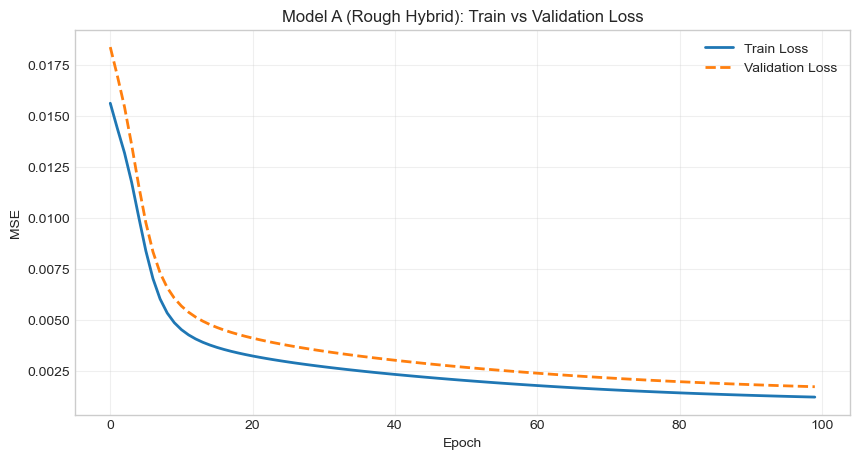

In [8]:
# A) Rough Hybrid Recurrent Network
print("\n" + "="*50)
print("TRAINING MODEL A: Rough Hybrid RNN (ECG)")
print("="*50)

model_rough_ecg = Sequential()
# Using a slightly larger hidden dim (12) because ECG is more complex
model_rough_ecg.add(RoughHybridRecurrentLayer(input_dim=5, hidden_dim=12, output_dim=1, memory_depth=2))

# Lower Learning Rate (0.015) to prevent divergence on complex signal
optimizer = SGD(lr=0.075)
model_rough_ecg.compile(loss=MSELoss(), optimizer=optimizer)

hist_rough_ecg = model_rough_ecg.fit(X_train_ecg, y_train_ecg, 
                                     validation_data=(X_test_ecg, y_test_ecg),
                                     epochs=100, verbose=True, log_freq=10)

# 1. Plot Learning Curves for Rough Model
plot_loss_curves(hist_rough_ecg, "Model A (Rough Hybrid): Train vs Validation Loss")


TRAINING MODEL B: Simple Elman RNN (ECG)
Starting Training | Mode: SGD | Epochs: 100 | Samples: 2618
Validation enabled | Val Samples: 1123


Epoch 1/100: 100%|██████████| 2618/2618 [00:02<00:00, 980.99sample/s, train_loss=0.00010] 


Epoch 1 finished. Train Loss: 0.013020 | Val Loss: 0.015765


Epoch 10/100: 100%|██████████| 2618/2618 [00:02<00:00, 874.30sample/s, train_loss=0.00007]


Epoch 10 finished. Train Loss: 0.003675 | Val Loss: 0.004849


Epoch 20/100: 100%|██████████| 2618/2618 [00:02<00:00, 961.77sample/s, train_loss=0.00004] 


Epoch 20 finished. Train Loss: 0.002615 | Val Loss: 0.003545


Epoch 30/100: 100%|██████████| 2618/2618 [00:02<00:00, 1083.07sample/s, train_loss=0.00002]


Epoch 30 finished. Train Loss: 0.001956 | Val Loss: 0.002764


Epoch 40/100: 100%|██████████| 2618/2618 [00:02<00:00, 979.41sample/s, train_loss=0.00001] 


Epoch 40 finished. Train Loss: 0.001552 | Val Loss: 0.002291


Epoch 50/100: 100%|██████████| 2618/2618 [00:02<00:00, 929.31sample/s, train_loss=0.00000]


Epoch 50 finished. Train Loss: 0.001333 | Val Loss: 0.002026


Epoch 60/100: 100%|██████████| 2618/2618 [00:02<00:00, 900.93sample/s, train_loss=0.00000]


Epoch 60 finished. Train Loss: 0.001218 | Val Loss: 0.001873


Epoch 70/100: 100%|██████████| 2618/2618 [00:02<00:00, 890.21sample/s, train_loss=0.00000]


Epoch 70 finished. Train Loss: 0.001151 | Val Loss: 0.001771


Epoch 80/100: 100%|██████████| 2618/2618 [00:02<00:00, 928.30sample/s, train_loss=0.00000]


Epoch 80 finished. Train Loss: 0.001102 | Val Loss: 0.001688


Epoch 90/100: 100%|██████████| 2618/2618 [00:02<00:00, 908.43sample/s, train_loss=0.00000]


Epoch 90 finished. Train Loss: 0.001058 | Val Loss: 0.001608


Epoch 100/100: 100%|██████████| 2618/2618 [00:02<00:00, 900.79sample/s, train_loss=0.00001]


Epoch 100 finished. Train Loss: 0.001011 | Val Loss: 0.001525
Training Complete. Time: 50.96s


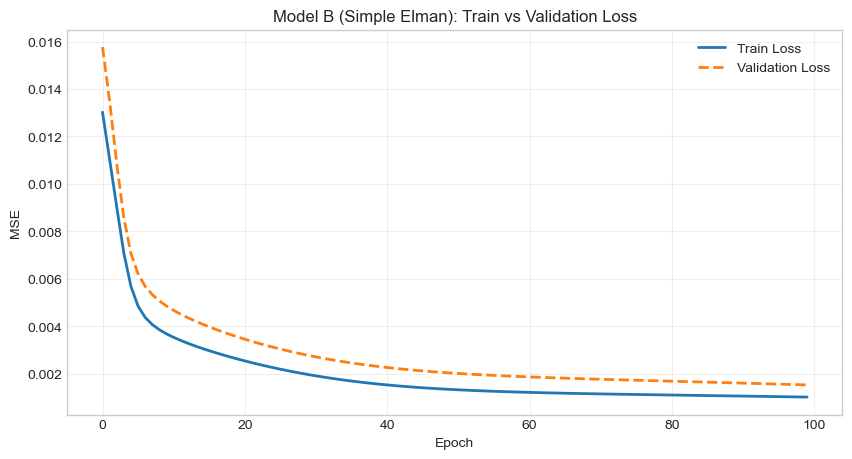

In [9]:
# B) Simple Elman Network

print("\n" + "="*50)
print("TRAINING MODEL B: Simple Elman RNN (ECG)")
print("="*50)

model_simple_ecg = Sequential()
model_simple_ecg.add(SimpleElmanLayer(input_dim=5, hidden_dim=12, output_dim=1))

optimizer_simple = SGD(lr=0.075)
model_simple_ecg.compile(loss=MSELoss(), optimizer=optimizer_simple)

hist_simple_ecg = model_simple_ecg.fit(X_train_ecg, y_train_ecg, 
                                       validation_data=(X_test_ecg, y_test_ecg),
                                       epochs=100, verbose=True, log_freq=10)

# 2. Plot Learning Curves for Simple Model
plot_loss_curves(hist_simple_ecg, "Model B (Simple Elman): Train vs Validation Loss")

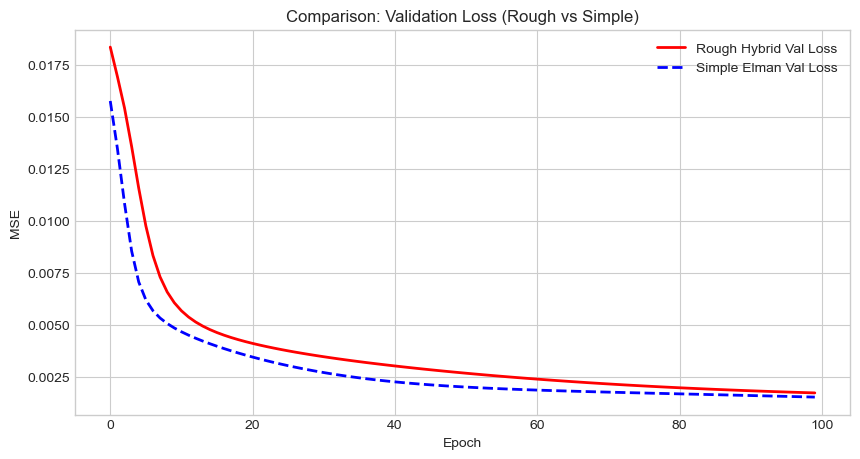

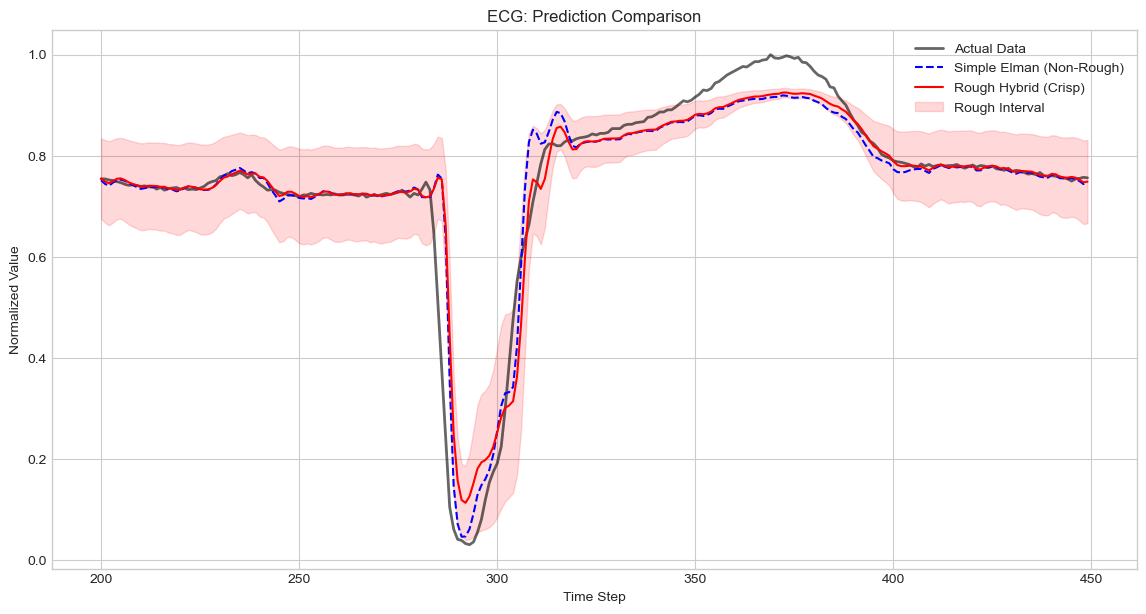

In [12]:
# C) Comparisons

# 3. Compare Validation Losses
plt.figure(figsize=(10, 5))
plt.plot(hist_rough_ecg['val_loss'], label='Rough Hybrid Val Loss', color='red', linewidth=2)
plt.plot(hist_simple_ecg['val_loss'], label='Simple Elman Val Loss', color='blue', linestyle='--', linewidth=2)
plt.title("Comparison: Validation Loss (Rough vs Simple)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

# 4. Visualize Predictions (Zoom to show pulse structure)
# ECG has periodic peaks, showing a range of 100 samples covers a few heartbeats
plot_recur_predictions(model_rough_ecg, model_simple_ecg, X_test_ecg, y_test_ecg, 
                       title="ECG: Prediction Comparison", sample_range=(200, 450))